In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2, style='whitegrid')
%matplotlib inline

In [2]:
df= pd.read_csv('diamonds.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# we drop these columns because their correlation is above .75. We keep the carat variable
df = df.drop(columns=['x','y','z'])

# Testing Linear Regression Assumptions

## 1. Linearity between X variables and the Y variable (Diamond Price)

### Linearity Carat vs. Price

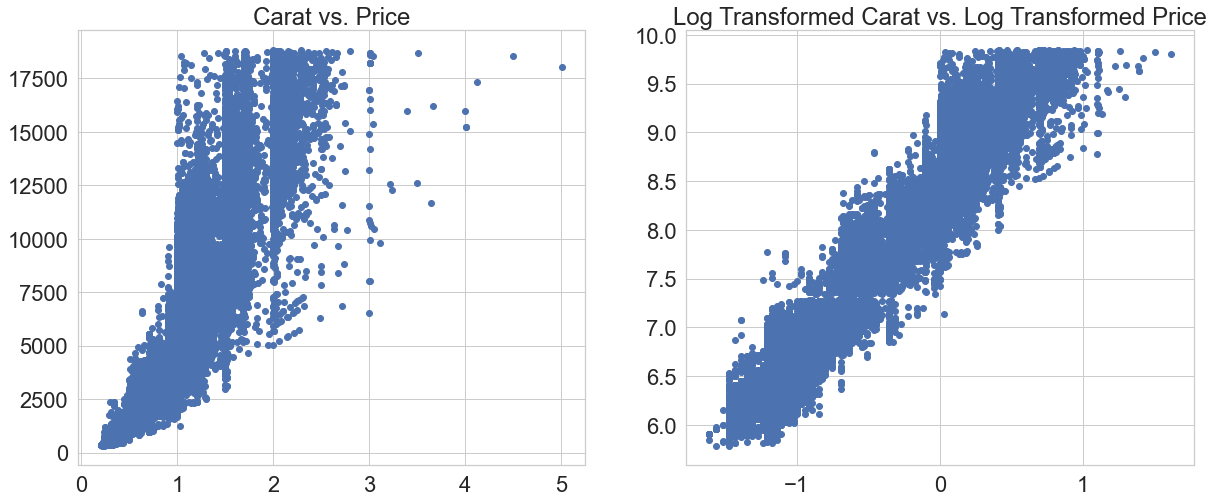

In [4]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Carat vs. Price')
plt.scatter(df.carat, df.price)

plt.subplot(1,2,2)
plt.title('Log Transformed Carat vs. Log Transformed Price')
plt.scatter(np.log(df.carat), np.log(df.price))

plt.show()

### Depth vs. Price

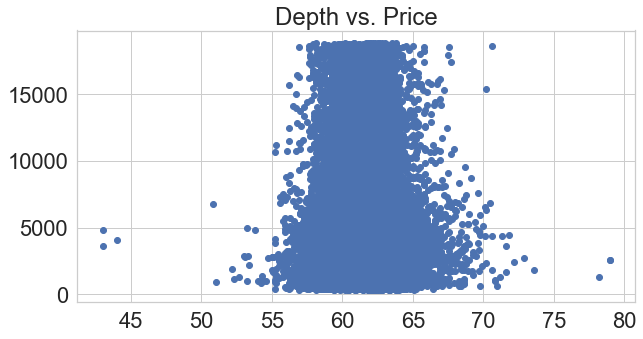

In [5]:
plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
plt.title('Depth vs. Price')
plt.scatter(df.depth, df.price)

plt.show()

Inferences<br>
- there doesn't seem to be any relationship between depth and price because there is no correlation between. A change in depth doesn't signify a change in price.

### Table vs. Price

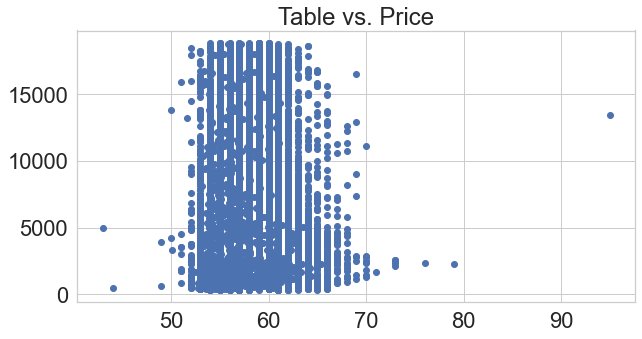

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
plt.title('Table vs. Price')
plt.scatter(df.table, df.price)

plt.show()

Inferences<br>
- there doesn't seem to be any relationship between table and price because there is no correlation between. A change in table doesn't signify a change in price.

## Log Transform Data

In [ ]:
# np log carat because it seemed like an exponential distribution. Now it looks more normal.
import matplotlib.style as style # import to change style

style.use('fivethirtyeight')

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df.carat)
plt.title(fontsize=20, label='"Carat" Distribution')

plt.subplot(1,2,2)
sns.distplot(np.log(df.carat))
plt.title(fontsize=20, label='"Carat" Log Transformed');

#therefore we will keep log transform carat
df['carat'] = np.log(df.carat)

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.distplot(df.price)
plt.title(fontsize=20, label='"Price" Distribution');
plt.subplot(1,3,2)
sns.distplot(np.log(df.price))
plt.title(fontsize=20, label='"Price" Log Transformed')

style.use('fivethirtyeight');

#therefore we will log transform price
df['price'] = np.log(df.price)



In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df.table)
plt.title(fontsize=20, label='Normally Distributed "Table"')

plt.subplot(1,2,2)
sns.distplot(df.depth)
plt.title(fontsize=20, label='Normally Distributed "Depth"');

## 2. Testing Normality

Diamond Regression DataSet - Regression Analysis and Diagnostics for formula: Price~carat
-------------------------------------------------------------------------------------


KeyboardInterrupt: 

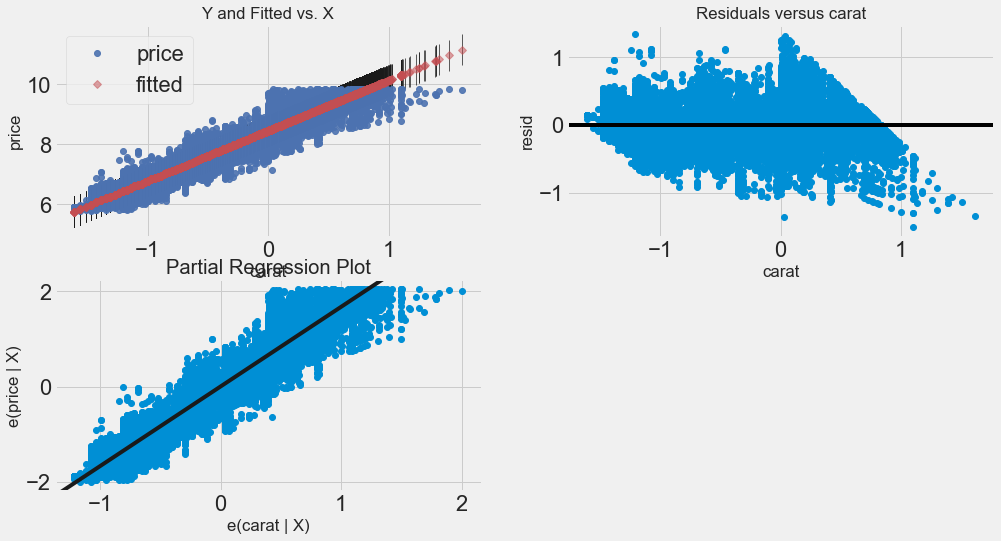

In [10]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms



results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['carat', 'depth', 'table']):
    print ("Diamond Regression DataSet - Regression Analysis and Diagnostics for formula: Price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
    
    model = smf.ols(formula=f, data=df).fit()
    
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
#     df.plot(kind='scatter', x=val, y='price');
#     plt.plot(X_new, preds, c='red', linewidth=2);
#     plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
#     fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")

In [ ]:
pd.DataFrame(results)

## Creating Dummy Variables for Categorical Columns

In [11]:
#create dummy variables for categorical data
cut_dummies = pd.get_dummies(df.cut, prefix='cut', drop_first=True)
color_dummies = pd.get_dummies(df.color, prefix='col', drop_first=True)
clarity_dummies = pd.get_dummies(df.clarity, prefix='clar', drop_first=True)


#now we can drop the columns we originally had
df.drop(['cut','color','clarity'], axis = 1, inplace = True)

In [12]:
#concat dummy df to the main df 
df1 = pd.concat([df, cut_dummies, color_dummies, clarity_dummies], axis=1)



In [13]:
df1.columns

Index(['carat', 'depth', 'table', 'price', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'col_E', 'col_F', 'col_G', 'col_H',
       'col_I', 'col_J', 'clar_IF', 'clar_SI1', 'clar_SI2', 'clar_VS1',
       'clar_VS2', 'clar_VVS1', 'clar_VVS2'],
      dtype='object')

In [14]:
# rename column to remove space
df1.rename(columns={'cut_Very Good': 'cut_Very_Good'}, inplace=True)

## Running a Practice/Baseline Model

In [15]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# set x and y variables
X = df1.drop(columns='price')
y = np.log(df1['price'])
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [16]:
predictors_int = sm.add_constant(X_train)
model = sm.OLS(y_train, predictors_int).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.022e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:21:39   Log-Likelihood:             1.0466e+05
No. Observations:               40455   AIC:                        -2.093e+05
Df Residuals:                   40434   BIC:                        -2.091e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.0666      0.007    304.463      0.000       2.053       2.080
carat             0.2430      0.000   1358.475      0.000       0.243       0.243
depth            -0.0001   7.39e-05     -1.688      0.091      -0.000    2.01e-05
table          3.494e-05   5.45e-05      0.642      0.521   -7.18e-05       0.000
cut_Good          0.0078      0.001     12.615      0.000       0.007       0.009
cut_Ideal         0.0183      0.001     29.604      0.000       0.017       0.020
cut_Premium       0.0147      0.001     24.690      0.000       0.014       0.016
cut_Very_Good     0.0119      0.001     20.026      0.000       0.011       0.013
col_E            -0.0069      0.000    -20.708      0.000      -0.008      -0.006
col_F            -0.0125      0.000    -37.127      0.000      -0.013      -0.012
col_G            -0.0219      0.000    -66.442      0.000      -0.023      -0.021
col_H            -0.0346      0.000    -98.676      0.000      -0.035      -0.034
col_I            -0.0512      0.000   -130.300      0.000      -0.052      -0.050
col_J            -0.0683      0.000   -141.392      0.000      -0.069      -0.067
clar_IF           0.1405      0.001    147.756      0.000       0.139       0.142
clar_SI1          0.0726      0.001     89.800      0.000       0.071       0.074
clar_SI2          0.0518      0.001     63.689      0.000       0.050       0.053
clar_VS1          0.1001      0.001    121.220      0.000       0.099       0.102
clar_VS2          0.0913      0.001    112.283      0.000       0.090       0.093
clar_VVS1         0.1273      0.001    145.457      0.000       0.126       0.129
clar_VVS2         0.1170      0.001    137.356      0.000       0.115       0.119
==============================================================================
Omnibus:                     2621.386   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12659.109
Skew:                          -0.042   Prob(JB):                         0.00
Kurtosis:                       5.739   Cond. No.                     6.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

#Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [124]:
import operator
feature_list = dict(zip(X_train.columns,linreg.coef_))
sorted_feature_list = sorted(feature_list.items(), key=operator.itemgetter(1), reverse=True)
sorted_feature_list

[('carat', 0.24301788830101229),
 ('clar_IF', 0.14047139619641386),
 ('clar_VVS1', 0.1273128422100087),
 ('clar_VVS2', 0.11700742020205225),
 ('clar_VS1', 0.10012032652908599),
 ('clar_VS2', 0.09130128674708483),
 ('clar_SI1', 0.07261272868127734),
 ('clar_SI2', 0.051829981010012495),
 ('cut_Ideal', 0.018296629559915355),
 ('cut_Premium', 0.014729827034644134),
 ('cut_Very_Good', 0.011939215927412233),
 ('cut_Good', 0.007842393624474238),
 ('table', 3.4943638926476106e-05),
 ('depth', -0.0001246944711385709),
 ('col_E', -0.006906075672719862),
 ('col_F', -0.01254158925224222),
 ('col_G', -0.02192068918209492),
 ('col_H', -0.03457197880017352),
 ('col_I', -0.05117022159350447),
 ('col_J', -0.06827043926207765)]

In [44]:
# printing out metrics
from sklearn import metrics 

print('Train R2:', sklearn.metrics.r2_score(y_train, y_hat_train))
print('Test R2:', sklearn.metrics.r2_score(y_test, y_hat_test))
print('\n')
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

Train R2: 0.9806005580054734
Test R2: 0.9804433773941287


Train Root Mean Squared Error: 0.018207304797526316
Test Root Mean Squared Error: 0.01841116334943573


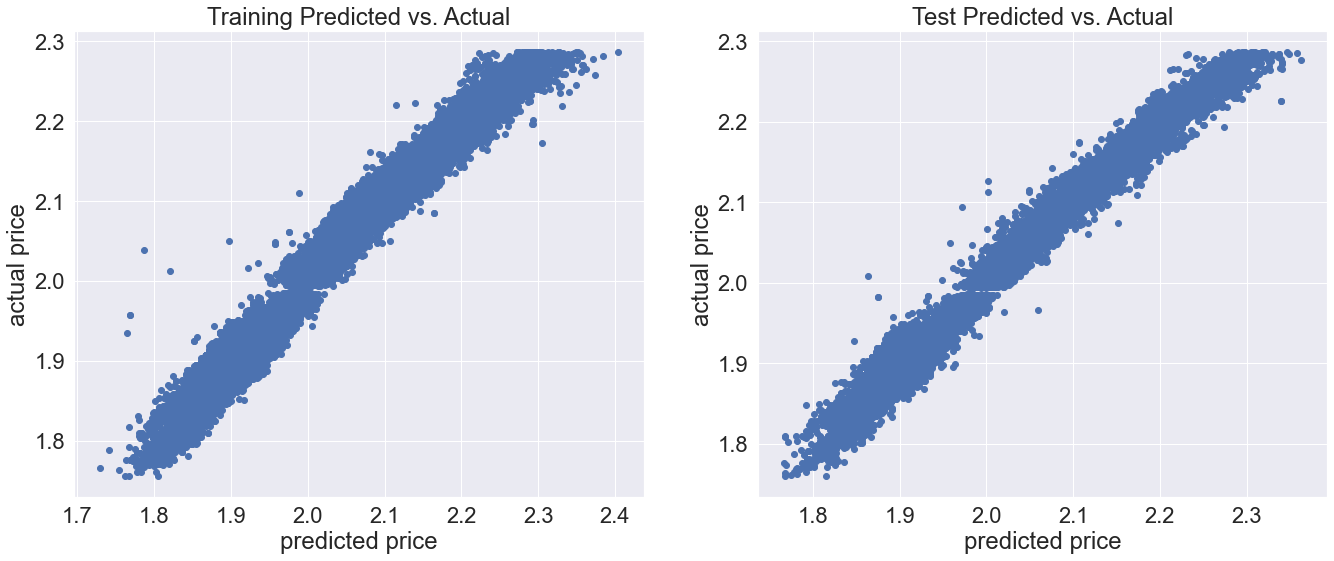

In [74]:
fig = plt.figure(figsize=(20,8))
sns.set(font_scale=2)
plt.subplot(1,2,1)
plt.scatter(y_hat_train, y_train)
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('Training Predicted vs. Actual')

plt.subplot(1,2,2)
plt.scatter(y_hat_test, y_test)
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('Test Predicted vs. Actual')
style.use('ggplot');